# Включения и циклы

In [1]:
import json
import os

import matplotlib.pyplot as plt
import numpy as np

from utils.lsm import get_trend, TrendInfo

## Подготовительные действия

**Вспомогательные функции:**

In [2]:
def visualize_trend(
    axis: plt.Axes,
    trend: TrendInfo,
    color: str,
    label: str,
    name: str = "",
) -> None:
    if name:
        axis.set_title(name, fontsize=17, fontweight="bold")

    axis.set_xlabel("количество элементов", fontsize=13, fontweight="bold", c="dimgray")
    axis.set_ylabel("время, с", fontsize=13, fontweight="bold", c="dimgray")

    axis.scatter(
        trend.abscissa,
        trend.ordinates,
        s=4,
        c=color,
        alpha=0.5,
        label=label,
    )

    if trend.ordinates_trend is not None:
        axis.plot(
            trend.abscissa,
            trend.ordinates_trend,
            c=color,
        )

    if trend.ordinates_above is not None and trend.ordinates_under is not None:
        axis.fill_between(
            trend.abscissa,
            trend.ordinates_above,
            trend.ordinates_under,
            color=color,
            alpha=0.2,
        )

    axis.set_xlim(trend.abscissa.min(), trend.abscissa.max())
    axis.grid(True)
    axis.legend()

**Константы:**

In [3]:
path_to_data_folder = os.path.join(".", "data")
assert os.path.exists(path_to_data_folder)

collection_sizes = np.array(list(range(10, 10 ** 7 + 1, 10000)), dtype=np.float32)
color_loop = "royalblue"
color_comp = "sandybrown"
label_loop = "loop"
label_comp = "comp"

## Визуализация

**Списки:**

In [4]:
path_to_list_times = os.path.join(path_to_data_folder, "lists.json")
assert os.path.exists(path_to_list_times)

with open(path_to_list_times, "r") as file:
    times: dict[str, list[int]] = json.load(file)

times_comp = np.array(times["comp"], dtype=np.float32)
times_loop = np.array(times["loop"], dtype=np.float32)

del times

In [5]:
trend_list_loop = get_trend(collection_sizes, times_loop)
trend_list_comp = get_trend(collection_sizes, times_comp)

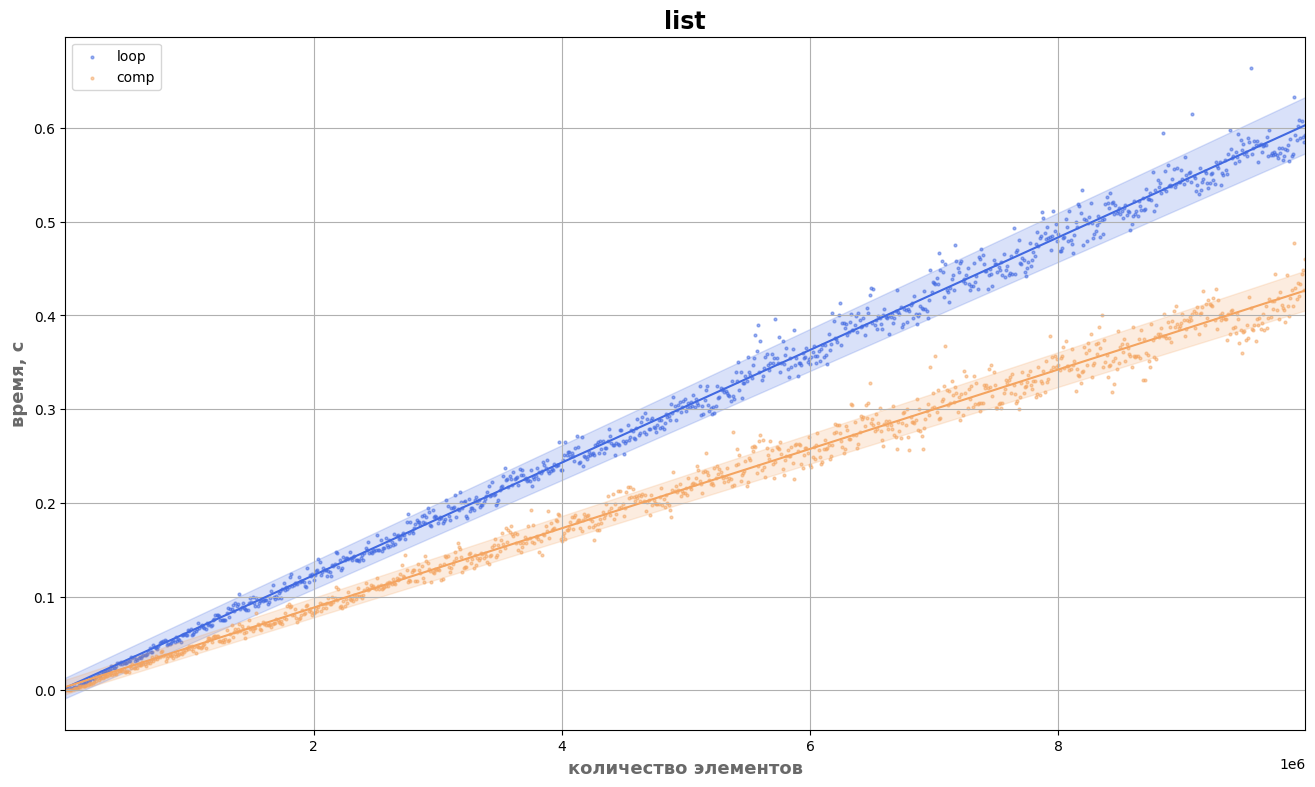

In [6]:
figure, axis = plt.subplots(figsize=(16, 9))

visualize_trend(
    axis=axis,
    trend=trend_list_loop,
    color=color_loop,
    label=label_loop,
    name="list",
)
visualize_trend(
    axis=axis,
    trend=trend_list_comp,
    color=color_comp,
    label=label_comp,
)

In [7]:
del times_comp
del times_loop

**Списки и словари:**

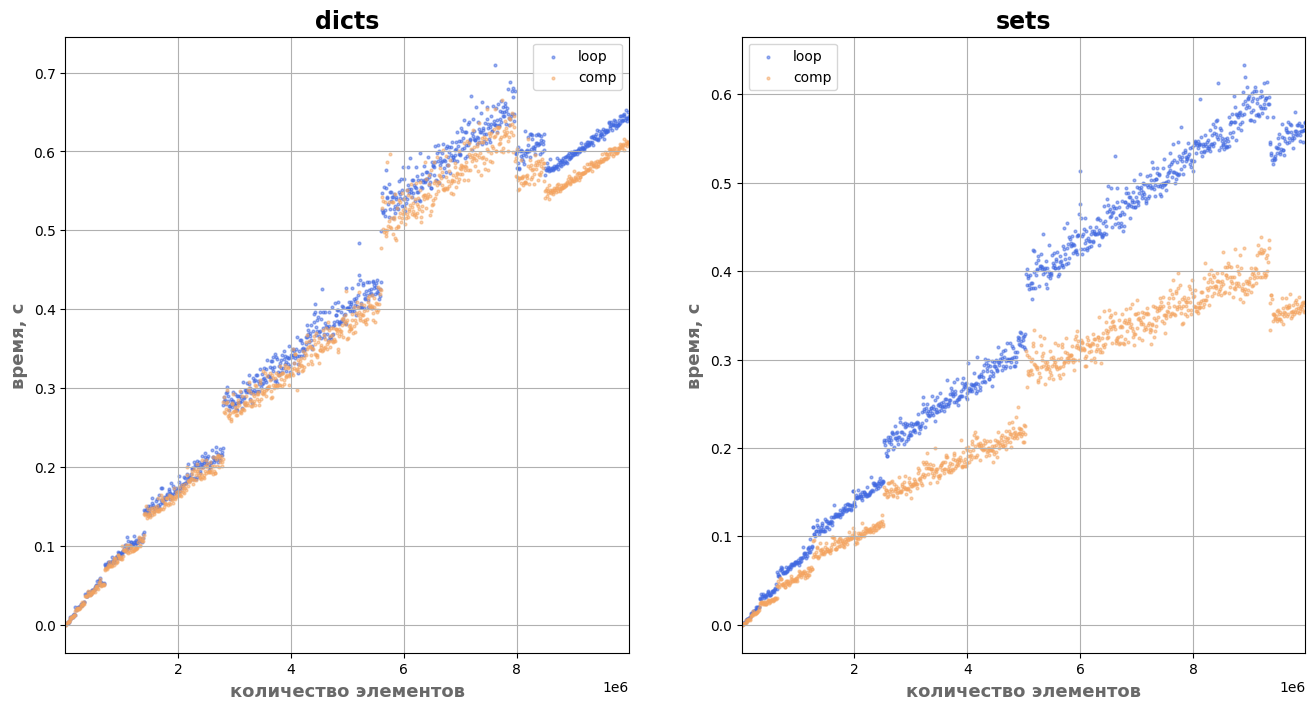

In [8]:
figure, axes = plt.subplots(1, 2, figsize=(16, 8))

for i, collection in enumerate(("dicts", "sets")):
    path_to_collection_times = os.path.join(path_to_data_folder, f"{collection}.json")
    assert os.path.exists(path_to_collection_times)

    with open(path_to_collection_times, "r") as file:
        times: dict[str, list[int]] = json.load(file)

    times_comp = np.array(times["comp"], dtype=np.float32)
    times_loop = np.array(times["loop"], dtype=np.float32)

    del times

    trend_loop = TrendInfo(
    abscissa=collection_sizes,
    ordinates=times_loop,
    )
    trend_comp = TrendInfo(
        abscissa=collection_sizes,
        ordinates=times_comp,
    )

    visualize_trend(
        axis=axes[i],
        trend=trend_loop,
        color=color_loop,
        label=label_loop,
        name=collection,
    )
    visualize_trend(
        axis=axes[i],
        trend=trend_comp,
        color=color_comp,
        label=label_comp,
    )

    del times_comp
    del times_loop